# About Dataset

Recycling trash is a crucial part of protecting our environment. Garbage must be divided into categories with similar recycling processes in order to enable the recycling process. The percentage of recycled waste can rise considerably if it is possible to separate domestic trash into several categories. Using the classes given, we will train the model in this notebook to categorize the input images and output the trash classification.

The six classification included in the **Garbage Classification Dataset** are: 
1.   cardboard (393) 
2.   glass (491)
3.   metal (400)
4.   paper(584)
5.   plastic (472)
6.   trash(127)
<br> 

The objective is to train the model to be able to predict the input images based on the provided classifications.

**Step 1** : load the libraries using the import libraries

Data Pre-Processing <br><br>
This section is the part wherein the data will be loaded & preprocessed into its needed variables and analyzed with its attributes to better understand the data and how it can be utilized by the different libraries that we will be importing in this section of the notebook. The first thing that we could notice would be the inclusion of the imports of the needed libraries from the ones that will be used to handle data and from the ones that would be used to handle the models that would then handle the data. The rest of the libraries that I would be importing for this notebook would be libaries concerning score and model evaluation that would be needed for the further calibration of the models that I will be using.

1. ``import tensorflow as tf`` - - Tensorflow is imported as *tf*. It automates data collection, tracks models, monitors performance, and retains models using best practices. It is a multiple-machine learning library that is open-sourced and can be used end-to-end.

2. ``from tensorflow import keras`` - It is a high-level neural library that runs on TensorFlow. Similar to TensorFlow, Keras provides APIs to build and train models. It has a Python built-in that makes it more user-friendly.

3. ``from tensorflow.keras.models import Sequential`` - The input_shape argument is used to help define the layers that will be in the network as the function executes and creates each layer.  

4. ``from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D`` - A ``dense`` layer is used when any features can be associated with any other featuree in a data point. If nearby associations among features are important, such as when detecting objects, these ``conv`` layer are important. for classfying or detecting,neighboorhoods matter. Pixels at the opposite corners can be helpful. A ``flatten`` layer is used when you need to linearize a multidimensional output to pass it into a dense layer. ``Dropouts`` reduce too mmuch association between features by dropping weights.


5. ``from tensorflow.keras.preprocessing.image import ImageDataGenerator`` - In image augmentation, different transformmmation are applied to original images to create mmultiple tranformed copies. Using the Keras ``ImageDataGenerator``class, yit can easily enhance the immages using a variety of techniques such as rotation, standardization, shifts, brightness, flips, and more. 

6. ``from PIL import Image`` - with PIL. you can open, manipulate, and save a wide range of image file formmmats using the Python programmming language. It is a free, open-source library that supports many different image formats.

7. ``from pathlib import Path`` - Path is one of the most important classes provided by the pathlib module. It represents a path to a directory or file on our computer's file system. 

8. ``import os`` - It allows to create and remove directories, fetch contenst, change the current directory, and more. Importing OS module is the first step in interacting with the underlying operating system.

9. ``import numpy as np`` - NumPy is imported as *np*. It is a general-purpose package for handling arrays. It is the core package for using Python in scientific computing. `` -

10. ``import matplotlib.pyplot as plt`` - Pyplot is imported as *plt*. The Matplotlib library provides graphical plotting capabilities and data visualization in Pythion and NumPy, Their numerical extension. 

10. ``from torchvision.datasets import ImageFolder`` - Deep learning model uses ImageFolder class to load images from our train and val folders into a PyThorch dataset. 

10. ``import torchvision.transforms as T`` - it allows to change brightness, contrast, saturation, and hu of an image randomly. Also, cropping the image with four corners and acentral crop. lastly, converting the image to grayscale.

5. ``print ("Done with declaration. Current version of Tenserflow :", tf.__version__)`` - It allows to print <b>*Done with the library declaration. Current version of Tenserflow is 2.8.2* </b>

In [2]:
import tensorflow as tf
#import tensorflow.contrib.keras as keras
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow import keras
from PIL import Image
from pathlib import Path
import scipy
import os
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

print("Done with library declaration, Current version of Tensorflow is: ", tf.__version__)

2024-05-14 21:13:34.720308: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Done with library declaration, Current version of Tensorflow is:  2.16.1


**Step 2** : Load and transform data. 

1. ``data_dir = Path('Garbage')`` - Data directories identify master sources of data as as replicas of the data in a distrbuted database. In this case, the path will be ***Garbage***.

2. ``transformer = T.Compose([T.Resize((32, 32)), T.ToTensor()])`` - It allows to resize the imagee to 32 x 32 pixels and the ToTensor converts preprocessed images into Neural Networks. 

3. ``dataset = ImageFolder(data_dir, transform = transformer)`` - Assigned the transform images to the dataset. The ImageFolder class to allows to load the images from our train and val folders into a PyThorch dataset.

4. ``print(dataset.classes)`` - It allows to print the classes in the dataset. Classes: ***cardboard***, ***glass***, ***metal***, ***paper***, ***plastic***, and ***trash***.

In [3]:

data_dir = Path('/Users/ounissifadoua/Downloads/garbage-classification/Garbage/original_images')

transformer = T.Compose([T.Resize((32, 32)), T.ToTensor()])
dataset = ImageFolder(data_dir, transform = transformer)


print(dataset.classes)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


**Step 3** : Plot and inspect the classes in the data. 


1. ``fig = plt.figure()`` - function is to create a figure object. When the figure's size needs to be tweaked and more than one axes object needs to be added to a figure, we must explicity use plt.figure(). 

2. ``ax = fig.add_axes([0,0,1,1])`` - It allows to plot the data for the classes. The dimension is set to ***0,0,1,1*** the first two array **0,0** are the horizontal and vertical coordinate of the lower left corner. The ***1,1*** are the width and height of the subplot.

3. ``counts = [393,491,400]`` - It is used to set the total counts of each class in the database. in this case we have six classes.

4. ``ax.bar(dataset.classes,counts)`` - It is used for bar plot. the range of classes can be shown here in a barplot

5. ``plt.title('Class Distribution')`` - It allows to set a title ***Class Distribution*** for the figure. It can be found on the upper side. 

6. ``plt.show()`` - is the pyplot module of the matplotlob library, this function allows all figures to be displayed. In this case, the total counts of all classes in the dataset will be displayed. It also helps to visualize more easily.

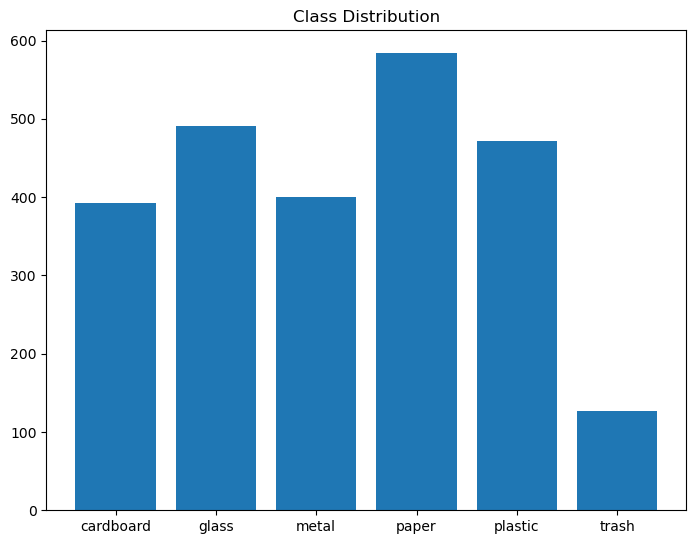

In [4]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
counts = [393,491,400,584,472,127]
ax.bar(dataset.classes,counts)
plt.title('Class Distribution')
plt.show()

**Step 4** : Split and store the data into train and test data. 

1. ``PATH_TRAIN = r"Garbage\original_images"`` - The train data used will come from garbage file images.
2. ``PATH_TEST = r"Garbage\processed_images"`` - The test data used will come from processed images. 
3. ``class_names = ['cardboard', 'glass', 'metal','paper','plastic','trash']`` - Will set all the classes in the class_names so that every time it is called it will return specific classes in the dataset

4. ``imagepath_cardboard = r"Garbage\original_images\cardboard"`` - The cardboard class is assigned to imagepath_cardboard.
5. ``graypath_cardboard = r"Garbage\processed_images\cardboard"`` - The processed image of cardboard class is assigned to graypath_cardboard.

6. ``File_listing = os.listdir(imagepath_cardboard)`` <br>
  ``for file in File_listing:`` - The os module provides a function which lists all the files in the specified path using the names provided by the fuction. In this case the specified is ***imagepath_cardboard***. With the use ``im.resize and img.convert`` functio, the cardboard images is resize by 32 x 32 pixels and in grayscale. 




In [5]:
PATH_TEST = r"/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images"
PATH_TRAIN = r"/Users/ounissifadoua/Downloads/garbage-classification/Garbage/original_images"
class_names = ['cardboard', 'glass', 'metal','paper','plastic','trash']


In [6]:
import os
from PIL import Image

image_dir = "/Users/ounissifadoua/Downloads/garbage-classification/Garbage/original_images/cardboard"
processed_dir = "/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images"

# Ensure the processed directory exists, create it if necessary
os.makedirs(processed_dir, exist_ok=True)

file_listing = os.listdir(image_dir)

for file_name in file_listing:
    file_path = os.path.join(image_dir, file_name)
    if os.path.isfile(file_path):  # Check if it's a file (not a directory)
        im = Image.open(file_path)
        img = im.resize((32, 32))
        gray = img.convert('L')
        output_path = os.path.join(processed_dir, file_name)
        gray.save(output_path, "JPEG")
    else:
        print(f"{file_path} is not a file.")

print("Processing complete.")


Processing complete.


In [7]:
import os
from PIL import Image

# Define absolute paths
base_dir = "/Users/ounissifadoua/Downloads/garbage-classification/Garbage"
imagepath_glass = os.path.join(base_dir, "original_images", "glass")
graypath_glass = os.path.join(base_dir, "processed_images", "glass")

# Ensure the processed directory exists, create it if necessary
os.makedirs(graypath_glass, exist_ok=True)

file_listing = os.listdir(imagepath_glass)

for file_name in file_listing:
    file_path = os.path.join(imagepath_glass, file_name)
    if os.path.isfile(file_path):  # Check if it's a file (not a directory)
        im = Image.open(file_path)
        img = im.resize((32, 32))
        gray = img.convert('L')
        output_path = os.path.join(graypath_glass, file_name)
        gray.save(output_path, "JPEG")
    else:
        print(f"{file_path} is not a file.")

print("Processing complete.")


Processing complete.


In [8]:
import os
from PIL import Image

# Define the paths
imagepath_metal = r"/Users/ounissifadoua/Downloads/garbage-classification/Garbage/original_images/metal"
graypath_metal = r"/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/metal"
# Ensure the processed directory exists, create it if necessary
os.makedirs(graypath_metal, exist_ok=True)

# Get the list of files in the metal directory
file_listing = os.listdir(imagepath_metal)

# Process each file
for file_name in file_listing:
    file_path = os.path.join(imagepath_metal, file_name)
    if os.path.isfile(file_path):  # Check if it's a file (not a directory)
        im = Image.open(file_path)
        img = im.resize((32, 32))
        gray = img.convert('L')
        output_path = os.path.join(graypath_metal, file_name)
        gray.save(output_path, "JPEG")
    else:
        print(f"{file_path} is not a file.")

print("Processing complete.")


Processing complete.


In [9]:
import os
from PIL import Image

# Define the paths
imagepath_paper = r"/Users/ounissifadoua/Downloads/garbage-classification/Garbage/original_images/paper"
graypath_paper = r"/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/paper"

# Ensure the processed directory exists, create it if necessary
os.makedirs(graypath_paper, exist_ok=True)

# Get the list of files in the paper directory
file_listing = os.listdir(imagepath_paper)

# Process each file
for file_name in file_listing:
    file_path = os.path.join(imagepath_paper, file_name)
    if os.path.isfile(file_path):  # Check if it's a file (not a directory)
        im = Image.open(file_path)
        img = im.resize((32, 32))
        gray = img.convert('L')
        output_path = os.path.join(graypath_paper, file_name)
        gray.save(output_path, "JPEG")
    else:
        print(f"{file_path} is not a file.")

print("Processing complete.")


Processing complete.


In [10]:
import os
from PIL import Image

# Define the paths
imagepath_plastic = r"/Users/ounissifadoua/Downloads/garbage-classification/Garbage/original_images/plastic"
graypath_plastic = r"/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/plastic"

# Ensure the processed directory exists, create it if necessary
os.makedirs(graypath_plastic, exist_ok=True)

# Get the list of files in the plastic directory
file_listing = os.listdir(imagepath_plastic)

# Process each file
for file_name in file_listing:
    file_path = os.path.join(imagepath_plastic, file_name)
    if os.path.isfile(file_path):  # Check if it's a file (not a directory)
        im = Image.open(file_path)
        img = im.resize((32, 32))
        gray = img.convert('L')
        output_path = os.path.join(graypath_plastic, file_name)
        gray.save(output_path, "JPEG")
    else:
        print(f"{file_path} is not a file.")

print("Processing complete.")


Processing complete.


In [11]:
import os
from PIL import Image

# Define the paths
imagepath_trash = r"/Users/ounissifadoua/Downloads/garbage-classification/Garbage/original_images/trash"
graypath_trash = r"/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/trash"

# Ensure the processed directory exists, create it if necessary
os.makedirs(graypath_trash, exist_ok=True)

# Get the list of files in the trash directory
file_listing = os.listdir(imagepath_trash)

# Process each file
for file_name in file_listing:
    file_path = os.path.join(imagepath_trash, file_name)
    if os.path.isfile(file_path):  # Check if it's a file (not a directory)
        im = Image.open(file_path)
        img = im.resize((32, 32))
        gray = img.convert('L')
        output_path = os.path.join(graypath_trash, file_name)
        gray.save(output_path, "JPEG")
    else:
        print(f"{file_path} is not a file.")

print("Processing complete.")


Processing complete.


In [12]:
import os

# Define the paths for each class
image_dir = "/Users/ounissifadoua/Downloads/garbage-classification/Garbage/original_images/cardboard"
processed_dir = "/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/cardboard"

imagepath_cardboard = os.path.join(image_dir, "cardboard")
imagepath_glass = os.path.join(image_dir, "glass")
imagepath_metal = os.path.join(image_dir, "metal")
imagepath_paper = os.path.join(image_dir, "paper")
imagepath_plastic = os.path.join(image_dir, "plastic")
imagepath_trash = os.path.join(image_dir, "trash")

graypath_cardboard = os.path.join(processed_dir, "cardboard")
graypath_glass = os.path.join(processed_dir, "glass")
graypath_metal = os.path.join(processed_dir, "metal")
graypath_paper = os.path.join(processed_dir, "paper")
graypath_plastic = os.path.join(processed_dir, "plastic")
graypath_trash = os.path.join(processed_dir, "trash")

# Now you can use these paths in your code


1. ``train_dir = os.path.join(PATH_TRAIN)`` <br>
``test_dir = os.path.join(PATH_TEST)`` <br> 
- The dataset is divided into two groups: the train data and the test data. The train data is where we teach the machine learning algorithm to predict specific images, while the test data is where we validate the algorithm's progress.

In [13]:
train_dir = os.path.join(PATH_TRAIN)
test_dir = os.path.join(PATH_TEST)

1. ``os.path.join`` - is a Python submodule of OS used for common pathname manipulation and provides a portable way o levergae operating system dependent functionality. In this case, we will use it in every class that our dataset has. for example, the ***imagepath_cardboard*** will intelligently join the path components which is the ***imagepath_cardboard_dir***.

In [14]:
imagepath_cardboard_dir = os.path.join(imagepath_cardboard)
imagepath_glass_dir = os.path.join(imagepath_glass)
imagepath_metal_dir = os.path.join(imagepath_metal)
imagepath_paper_dir = os.path.join(imagepath_paper)
imagepath_plastic_dir = os.path.join(imagepath_plastic)
imagepath_trash_dir = os.path.join(imagepath_trash)


1. ``len(os.listdir(PATH_TRAIN))`` - it allows to display the list of file in the  ***PATH_TRAIN***. It returns the total count of the list in the specified path. 

In [15]:
len(os.listdir(PATH_TRAIN))


7

1. ``IMG_HEIGHT = 32`` <br>
``IMG_WIDTH = 32`` <br>

In [16]:
IMG_HEIGHT = 32
IMG_WIDTH = 32


1. ``image_gen = ImageDataGenerator(rescale=1./255)`` - Using the Keras ImageDataGeneratorclass, it can easily transform the image to range from range ***0,255*** to ***0,1***

In [17]:
image_gen = ImageDataGenerator(rescale=1./255)


1. the train folder contain a single folder inside which all the train images are present. Here are the most commonly used attributes along with the ``flow_from_directory()`` method. The ``directory`` where the classes of folders are present. We set the shuffle to ***true*** to shuffle the order of the images. The ``target_size``which we set the input image to ***32 x 32*** pixels. lastly, the ``class_mode`` where we set to ***categorical*** because we have more than two classes in the dataset.

In [18]:
train_data_gen = image_gen.flow_from_directory(
    directory = train_dir, 
    shuffle=True, 
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')


Found 2527 images belonging to 6 classes.


1. Same as above, the test folder contain a single folder inside which all the test images are present. Here are the most commonly used attributes along with the ``flow_from_directory()`` method. The ``directory`` where the classes of folders are present. We set the shuffle to ***true*** to shuffle the order of the images. The ``target_size``which we set the input image to ***32 x 32*** pixels. lastly, the ``class_mode`` where we set to ***categorical*** because we have more than two classes in the dataset.

In [19]:
test_data_gen = image_gen.flow_from_directory(
    directory = test_dir, 
    shuffle=True, 
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 2527 images belonging to 6 classes.


1.  The ``plotImages`` function is to create a figure object. When the figure's size needs to be tweaked and more than one axes object needs to be added to a figure, we must explicity use plt.figure(). This ``(figsize=(20,20))`` function allows to set the size of the figure, In this case the figure is set by ***20:20*** ratio. Also, The ``ax.imshow`` display the image in 2D regualr raster. The ``axes.flatten()`` it returns the flattened version of the array. The ``plt.show()`` is the pyplot allows all sets figures to be displayed. 

**Step 5** : Display and examine the images from the dataset.

Found 2527 images belonging to 6 classes.


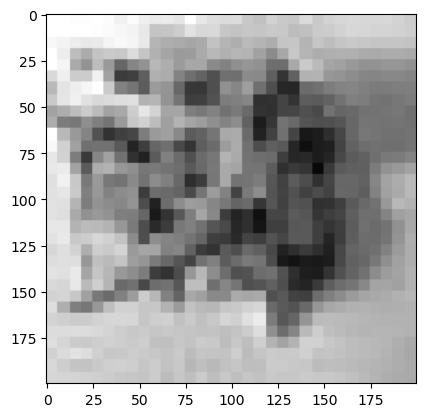

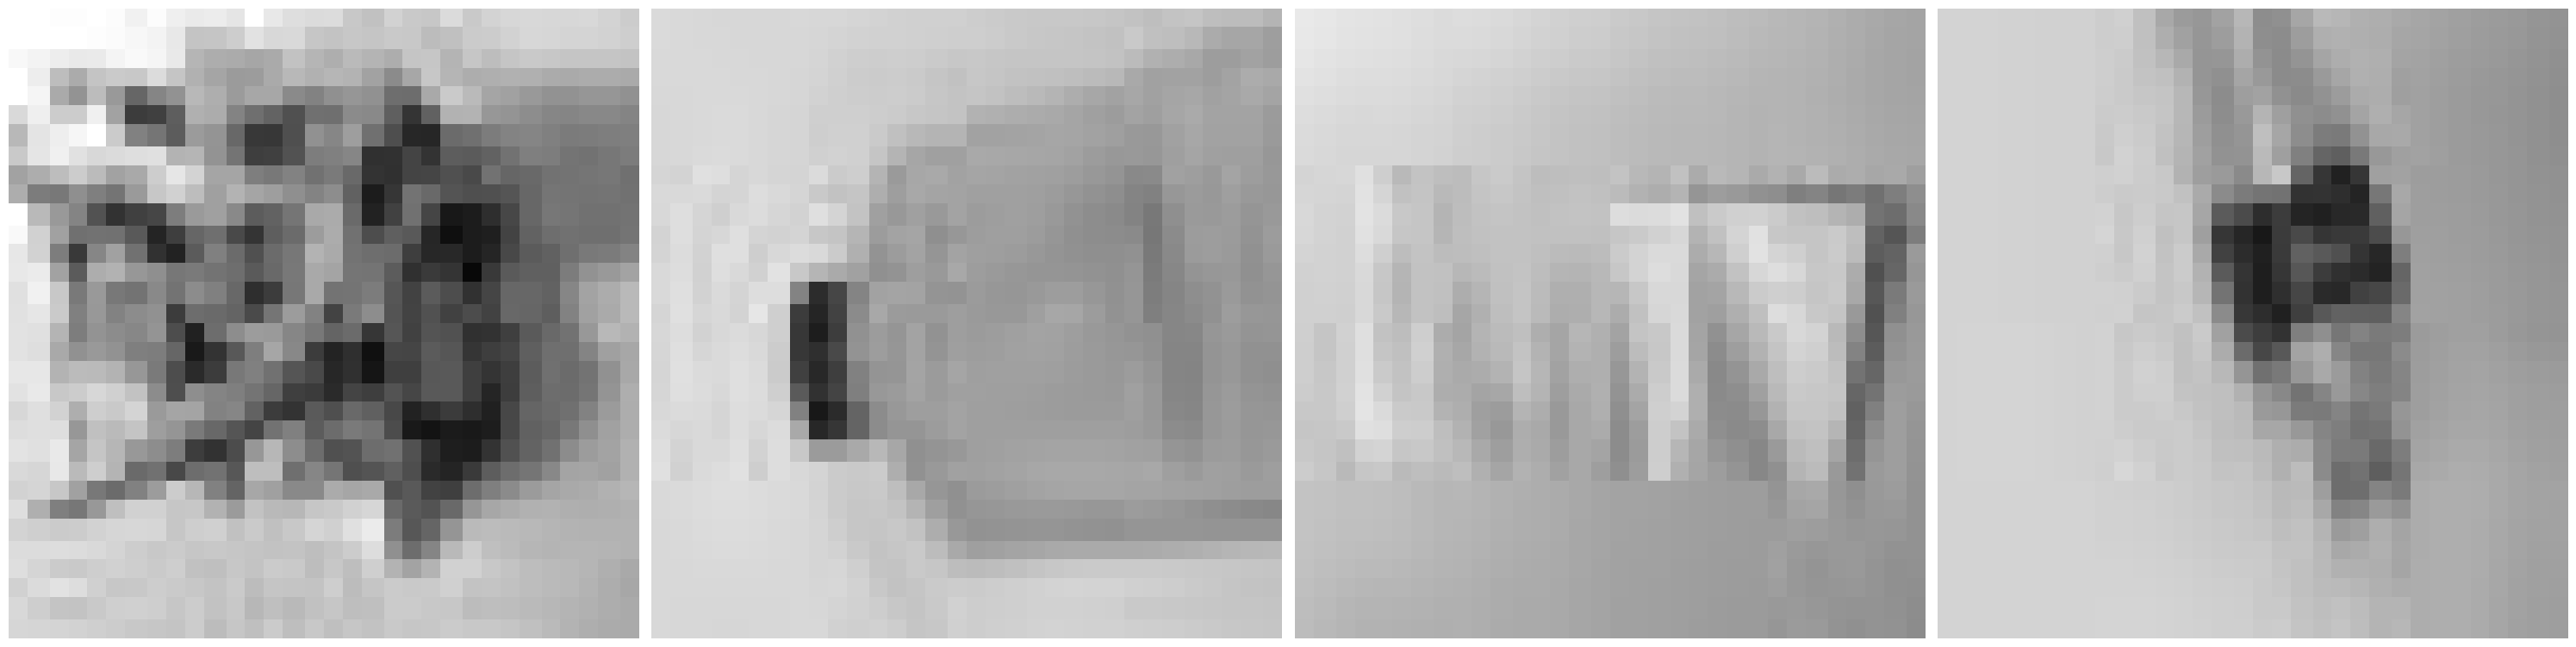

In [20]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming you have defined test_dir and image_gen somewhere in your code

# Generate sample data
sample_data_gen = image_gen.flow_from_directory(
    directory=test_dir, 
    shuffle=True, 
    target_size=(200, 200),
    class_mode='categorical')

# Get a batch of sample images
sample_training_images, _ = next(sample_data_gen)

# Plot the first image from the batch
plt.figure()
plt.imshow(sample_training_images[0])
plt.show()

# Function to plot multiple images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 4, figsize=(30, 30))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Use the plotImages function to plot multiple images
plotImages(sample_training_images)


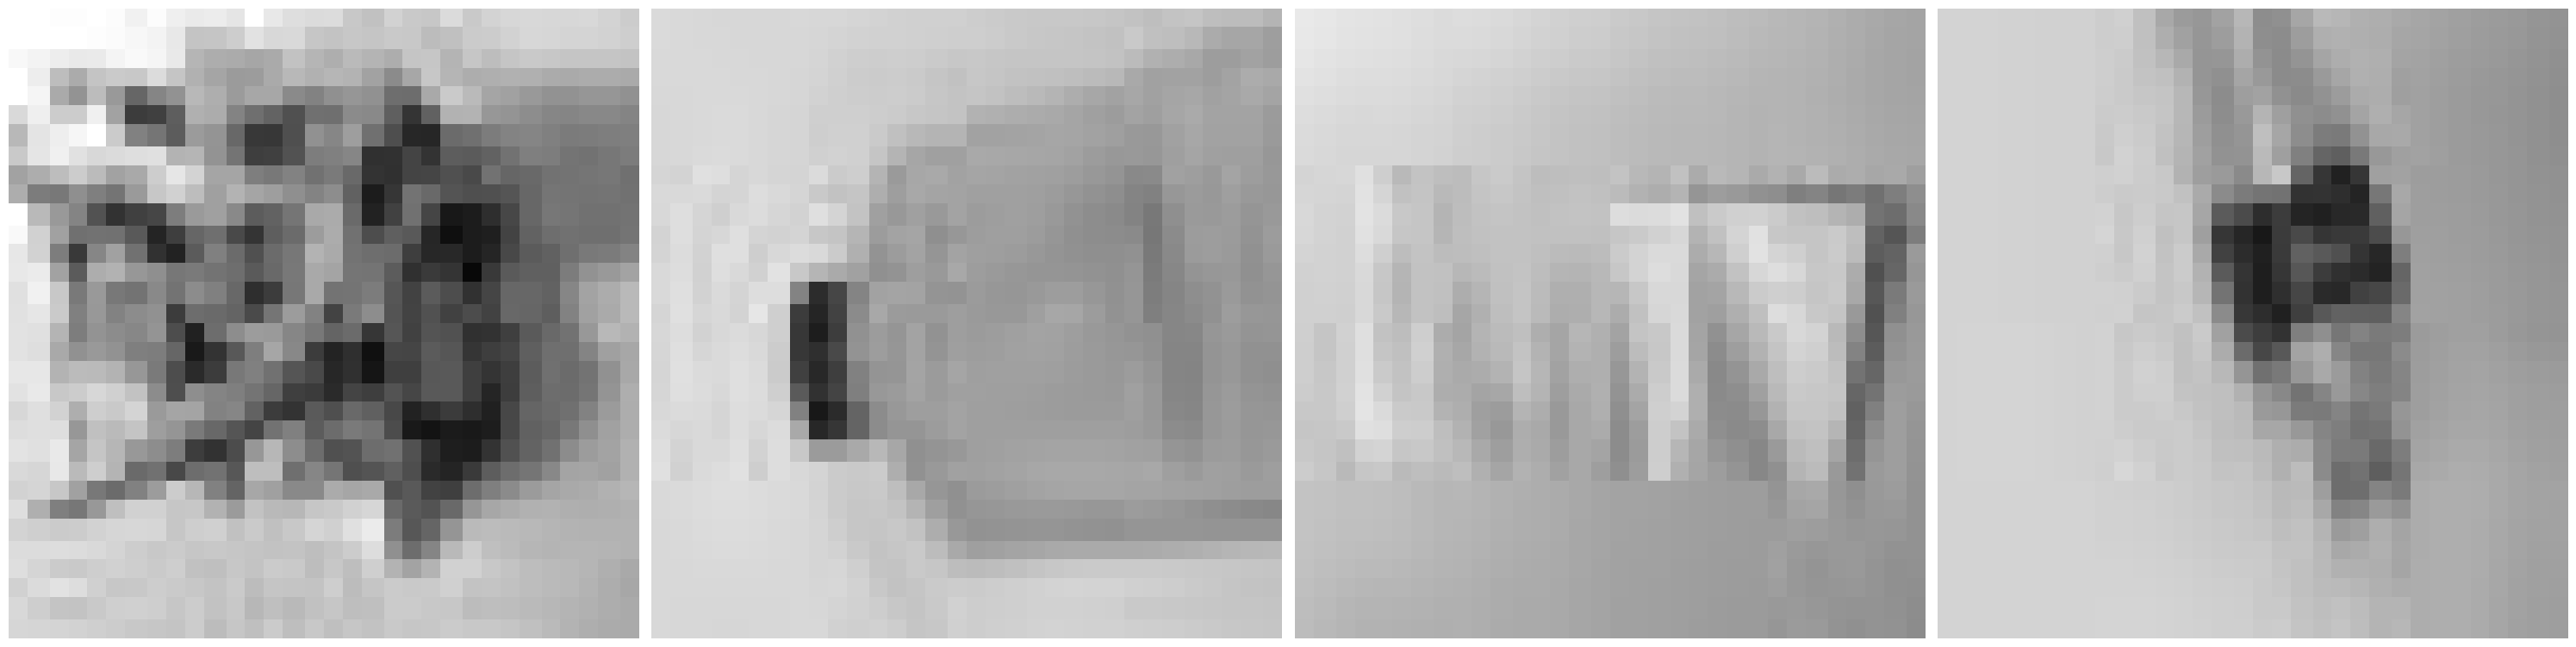

In [21]:
plotImages(sample_training_images[:4])

**Step 6** : Builing theee the Neural Network by using the Sequentil API

1. ``model = Sequential()`` -  It is a model to use when there is only one input and one output on the data you need to show. It is not appropriate to use this model if you have multiple inputs and outputs. It helps you train and infer conclusions from your model. the ``input_shape=(28,28)`` represent the resolution of the image: ***32 x 32*** pixels. ``Dense`` It creates a new dense layer and returns the necessary output data for your model to use. Activation is the element-wise activation function used to pass through the activation arguments,  relu is the rectified linear unit activation function, and Sigmoid is equivalent to a 2-element Softmax, where the second element is taken to be zero.

In [22]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(6, activation='softmax')
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Step 7** : Defining an optimmizer, a loss function, and other useful training parameters.

In [23]:
batch_size = 45
epochs = 60
model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,878 (187.02 KB)

 Trainable params: 47,878 (187.02 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
import os

# Define the new directory paths for each class (training)
cardboard_dir = '/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/cardboard/'
glass_dir = '/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/glass/'
metal_dir = '/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/metal/'
paper_dir = '/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/paper/'
plastic_dir = '/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/plastic/'
trash_dir = '/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/trash/'

# Define the new directory paths for each class (testing)
graypath_cardboard = '/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/cardboard/'
graypath_glass = '/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/glass/'
graypath_metal = '/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/metal/'
graypath_paper = '/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/paper/'
graypath_plastic = '/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/plastic/'
graypath_trash = '/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/trash/'

# Check if the directories exist (training)
if os.path.exists(cardboard_dir) and os.path.exists(glass_dir) and os.path.exists(metal_dir) \
        and os.path.exists(paper_dir) and os.path.exists(plastic_dir) and os.path.exists(trash_dir):
    # Count the number of images in each directory (training)
    num_cardboard_train = len(os.listdir(cardboard_dir))
    num_glass_train = len(os.listdir(glass_dir))
    num_metal_train = len(os.listdir(metal_dir))
    num_paper_train = len(os.listdir(paper_dir))
    num_plastic_train = len(os.listdir(plastic_dir))
    num_trash_train = len(os.listdir(trash_dir))

    # Check if the directories exist (testing)
    if os.path.exists(graypath_cardboard) and os.path.exists(graypath_glass) \
            and os.path.exists(graypath_metal) and os.path.exists(graypath_paper) \
            and os.path.exists(graypath_plastic) and os.path.exists(graypath_trash):
        # Count the number of images in each directory (testing)
        num_cardboard_test = len(os.listdir(graypath_cardboard))
        num_glass_test = len(os.listdir(graypath_glass))
        num_metal_test = len(os.listdir(graypath_metal))
        num_paper_test = len(os.listdir(graypath_paper))
        num_plastic_test = len(os.listdir(graypath_plastic))
        num_trash_test = len(os.listdir(graypath_trash))

        # Calculate total number of images (training and testing)
        total_train = num_cardboard_train + num_glass_train + num_metal_train + num_paper_train + num_plastic_train + num_trash_train
        total_test = num_cardboard_test + num_glass_test + num_metal_test + num_paper_test + num_plastic_test + num_trash_test
        print(f"Total number of training images: {total_train}")
        print(f"Total number of testing images: {total_test}")
    else:
        print("One or more testing directories do not exist.")
else:
    print("One or more training directories do not exist.")


Total number of training images: 2527
Total number of testing images: 2527


**Step 8** : Training the model by using the train dataset.

1. The os module provides a function which lists all the files in the specified path using the names provided by the fuction. for example, ***imagepath_cardboard_dir*** with the num_cardboard_train.

2. ``total_train = num_cardboard_train + num_glass_train + num_metal_train`` - total number of train set for ***cardboard***, ***glass***, ***metal***, ***paper***, ***plastic***, and ***trash***.

3. ``total_test = num_cardboard_test + num_glass_test + num_metal_test`` - total number of test set for ***cardboard***, ***glass***, ***metal***, ***paper***, ***plastic***, and ***trash***.

1. In this model the number of epochs is set to 60 this number represent the number of times the training set to run. A model that is well-fit produces more accurate results, as it generalizes to similar data to that on which it was trained. ``validation_data`` Data on which to evaluate the loss and any model metrics at the end of each epoch. ``validation_steps`` Only relevant if validation_data is provided and is a tf. data dataset. Total number of steps to draw before stopping when performing validation at the end of every epoch.

In [25]:
history = model.fit(
    train_data_gen,
    validation_data = train_data_gen,
    steps_per_epoch= total_train // batch_size,
    epochs = epochs,
    validation_steps= total_test // batch_size,
    callbacks = [tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                min_delta=0.01,
                patience=7)]
)

Epoch 1/60


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 287ms/step - accuracy: 0.2244 - loss: 1.7340 - val_accuracy: 0.2935 - val_loss: 1.6531
Epoch 2/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.2999 - loss: 1.6083

2024-05-14 21:14:48.373772: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.3241 - loss: 1.5853 - val_accuracy: 0.3483 - val_loss: 1.5244
Epoch 3/60


2024-05-14 21:14:50.424142: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 26s 450ms/step - accuracy: 0.4005 - loss: 1.4608 - val_accuracy: 0.4453 - val_loss: 1.3823
Epoch 4/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 7s 216ms/step - accuracy: 0.4365 - loss: 1.4273

2024-05-14 21:15:21.148465: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 159ms/step - accuracy: 0.4539 - loss: 1.3929 - val_accuracy: 0.4707 - val_loss: 1.3153
Epoch 5/60


2024-05-14 21:15:25.094522: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 295ms/step - accuracy: 0.4731 - loss: 1.3282 - val_accuracy: 0.5346 - val_loss: 1.2107
Epoch 6/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - accuracy: 0.5662 - loss: 1.1500

2024-05-14 21:15:46.342486: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - accuracy: 0.5476 - loss: 1.2173 - val_accuracy: 0.4925 - val_loss: 1.2685
Epoch 7/60


2024-05-14 21:15:49.802141: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 287ms/step - accuracy: 0.5313 - loss: 1.1865 - val_accuracy: 0.5184 - val_loss: 1.2753
Epoch 8/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.5426 - loss: 1.2410

2024-05-14 21:16:10.163069: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.5575 - loss: 1.1968 - val_accuracy: 0.5959 - val_loss: 1.1299
Epoch 9/60


2024-05-14 21:16:13.469077: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 546ms/step - accuracy: 0.5820 - loss: 1.1328 - val_accuracy: 0.5893 - val_loss: 1.1042
Epoch 10/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.5538 - loss: 1.1322

2024-05-14 21:16:47.798667: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.5658 - loss: 1.1114 - val_accuracy: 0.6041 - val_loss: 1.0790
Epoch 11/60


2024-05-14 21:16:50.478633: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 386ms/step - accuracy: 0.5951 - loss: 1.0992 - val_accuracy: 0.6362 - val_loss: 0.9971
Epoch 12/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - accuracy: 0.5998 - loss: 1.0207

2024-05-14 21:17:16.372127: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - accuracy: 0.6042 - loss: 1.0245 - val_accuracy: 0.6122 - val_loss: 1.0255
Epoch 13/60


2024-05-14 21:17:20.260041: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 633ms/step - accuracy: 0.6136 - loss: 1.0650 - val_accuracy: 0.6551 - val_loss: 0.9397
Epoch 14/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 6s 203ms/step - accuracy: 0.6608 - loss: 0.9492

2024-05-14 21:18:01.789181: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - accuracy: 0.6501 - loss: 0.9577 - val_accuracy: 0.5673 - val_loss: 1.1125
Epoch 15/60


2024-05-14 21:18:07.179704: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 648ms/step - accuracy: 0.6133 - loss: 1.0168 - val_accuracy: 0.6948 - val_loss: 0.8540
Epoch 16/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 14s 426ms/step - accuracy: 0.6592 - loss: 0.9655

2024-05-14 21:18:53.977633: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 289ms/step - accuracy: 0.6676 - loss: 0.9256 - val_accuracy: 0.6735 - val_loss: 0.8895
Epoch 17/60


2024-05-14 21:19:00.456632: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 52s 901ms/step - accuracy: 0.6638 - loss: 0.9136 - val_accuracy: 0.6842 - val_loss: 0.8775
Epoch 18/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 12s 366ms/step - accuracy: 0.6981 - loss: 0.7693

2024-05-14 21:20:00.356791: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 267ms/step - accuracy: 0.6959 - loss: 0.7857 - val_accuracy: 0.7007 - val_loss: 0.8357
Epoch 19/60


2024-05-14 21:20:06.973882: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 750ms/step - accuracy: 0.6902 - loss: 0.8294 - val_accuracy: 0.6763 - val_loss: 0.8626
Epoch 20/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step - accuracy: 0.6903 - loss: 0.8515

2024-05-14 21:20:55.636765: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 228ms/step - accuracy: 0.7055 - loss: 0.8165 - val_accuracy: 0.6884 - val_loss: 0.7902
Epoch 21/60


2024-05-14 21:21:02.536810: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 57s 518ms/step - accuracy: 0.7150 - loss: 0.7735 - val_accuracy: 0.7232 - val_loss: 0.7648
Epoch 22/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 7s 220ms/step - accuracy: 0.7076 - loss: 0.7759

2024-05-14 21:22:04.866567: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 191ms/step - accuracy: 0.7198 - loss: 0.7582 - val_accuracy: 0.7469 - val_loss: 0.7193
Epoch 23/60


2024-05-14 21:22:10.503922: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 627ms/step - accuracy: 0.7285 - loss: 0.7465 - val_accuracy: 0.7478 - val_loss: 0.7084
Epoch 24/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 6s 200ms/step - accuracy: 0.7251 - loss: 0.7178

2024-05-14 21:22:51.924447: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - accuracy: 0.7350 - loss: 0.7133 - val_accuracy: 0.7728 - val_loss: 0.6333
Epoch 25/60


2024-05-14 21:22:56.719236: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 23s 389ms/step - accuracy: 0.7471 - loss: 0.7040 - val_accuracy: 0.7545 - val_loss: 0.6737
Epoch 26/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.7366 - loss: 0.7211

2024-05-14 21:23:23.218621: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - accuracy: 0.7581 - loss: 0.6851 - val_accuracy: 0.7701 - val_loss: 0.6495
Epoch 27/60


2024-05-14 21:23:26.427699: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 374ms/step - accuracy: 0.7665 - loss: 0.6645 - val_accuracy: 0.7684 - val_loss: 0.6320
Epoch 28/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.7201 - loss: 0.6932

2024-05-14 21:23:52.442422: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - accuracy: 0.7297 - loss: 0.6880 - val_accuracy: 0.7497 - val_loss: 0.6604
Epoch 29/60


2024-05-14 21:23:55.487266: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 367ms/step - accuracy: 0.7639 - loss: 0.6610 - val_accuracy: 0.7662 - val_loss: 0.6477
Epoch 30/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - accuracy: 0.7548 - loss: 0.6356

2024-05-14 21:24:20.859736: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - accuracy: 0.7704 - loss: 0.6136 - val_accuracy: 0.7878 - val_loss: 0.5877
Epoch 31/60


2024-05-14 21:24:24.866562: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 462ms/step - accuracy: 0.7978 - loss: 0.5904 - val_accuracy: 0.8108 - val_loss: 0.5513
Epoch 32/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - accuracy: 0.7350 - loss: 0.6936

2024-05-14 21:24:55.654249: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - accuracy: 0.7367 - loss: 0.6914 - val_accuracy: 0.7850 - val_loss: 0.5721
Epoch 33/60


2024-05-14 21:24:58.603461: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 248ms/step - accuracy: 0.7690 - loss: 0.6125 - val_accuracy: 0.7785 - val_loss: 0.6021
Epoch 34/60
22/56 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.8182 - loss: 0.5032

2024-05-14 21:25:16.074422: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.8139 - loss: 0.5164 - val_accuracy: 0.8299 - val_loss: 0.5412
Epoch 35/60


2024-05-14 21:25:18.342712: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 251ms/step - accuracy: 0.8154 - loss: 0.5421 - val_accuracy: 0.8438 - val_loss: 0.4505
Epoch 36/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.8207 - loss: 0.5638

2024-05-14 21:25:35.878989: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.8165 - loss: 0.5516 - val_accuracy: 0.8245 - val_loss: 0.4893
Epoch 37/60


2024-05-14 21:25:38.987255: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 234ms/step - accuracy: 0.8159 - loss: 0.5200 - val_accuracy: 0.8253 - val_loss: 0.4700
Epoch 38/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.8524 - loss: 0.4331 

2024-05-14 21:25:55.276639: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.8512 - loss: 0.4391 - val_accuracy: 0.8476 - val_loss: 0.4446
Epoch 39/60


2024-05-14 21:25:57.364104: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 254ms/step - accuracy: 0.8232 - loss: 0.4838 - val_accuracy: 0.8521 - val_loss: 0.4437
Epoch 40/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.8244 - loss: 0.4929

2024-05-14 21:26:15.259977: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.8334 - loss: 0.4674 - val_accuracy: 0.8735 - val_loss: 0.3941
Epoch 41/60


2024-05-14 21:26:17.668752: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 322ms/step - accuracy: 0.8529 - loss: 0.4144 - val_accuracy: 0.8527 - val_loss: 0.4167
Epoch 42/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.8472 - loss: 0.4190

2024-05-14 21:26:40.353013: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - accuracy: 0.8588 - loss: 0.3998 - val_accuracy: 0.8408 - val_loss: 0.4571
Epoch 43/60


2024-05-14 21:26:43.781154: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 555ms/step - accuracy: 0.8498 - loss: 0.4428 - val_accuracy: 0.8839 - val_loss: 0.3562
Epoch 44/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 7s 226ms/step - accuracy: 0.8545 - loss: 0.3900

2024-05-14 21:27:20.908101: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 196ms/step - accuracy: 0.8546 - loss: 0.3879 - val_accuracy: 0.9048 - val_loss: 0.3321
Epoch 45/60


2024-05-14 21:27:26.704579: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 442ms/step - accuracy: 0.8706 - loss: 0.3867 - val_accuracy: 0.8811 - val_loss: 0.3610
Epoch 46/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8809 - loss: 0.3381

2024-05-14 21:27:56.359651: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.8702 - loss: 0.3621 - val_accuracy: 0.8218 - val_loss: 0.4493
Epoch 47/60


2024-05-14 21:27:58.496686: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 302ms/step - accuracy: 0.8711 - loss: 0.3894 - val_accuracy: 0.8929 - val_loss: 0.3278
Epoch 48/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.8650 - loss: 0.4064

2024-05-14 21:28:19.048421: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.8717 - loss: 0.3912 - val_accuracy: 0.9116 - val_loss: 0.2895
Epoch 49/60


2024-05-14 21:28:21.822443: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 255ms/step - accuracy: 0.8763 - loss: 0.3471 - val_accuracy: 0.9141 - val_loss: 0.2728
Epoch 50/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.8997 - loss: 0.3219 

2024-05-14 21:28:39.142369: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.9003 - loss: 0.3147 - val_accuracy: 0.9156 - val_loss: 0.2997
Epoch 51/60


2024-05-14 21:28:41.148786: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 247ms/step - accuracy: 0.9095 - loss: 0.2843 - val_accuracy: 0.9146 - val_loss: 0.2546
Epoch 52/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.9231 - loss: 0.2733

2024-05-14 21:28:58.289993: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.9244 - loss: 0.2696 - val_accuracy: 0.9224 - val_loss: 0.2555
Epoch 53/60


2024-05-14 21:29:01.689679: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 348ms/step - accuracy: 0.8998 - loss: 0.2869 - val_accuracy: 0.8917 - val_loss: 0.3049
Epoch 54/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 7s 217ms/step - accuracy: 0.9189 - loss: 0.2639

2024-05-14 21:29:26.565905: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - accuracy: 0.9178 - loss: 0.2702 - val_accuracy: 0.9048 - val_loss: 0.2901
Epoch 55/60


2024-05-14 21:29:29.755609: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 291ms/step - accuracy: 0.9125 - loss: 0.2670 - val_accuracy: 0.9302 - val_loss: 0.2145
Epoch 56/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 0.9019 - loss: 0.3265

2024-05-14 21:29:50.542786: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.9005 - loss: 0.3118 - val_accuracy: 0.8966 - val_loss: 0.2829
Epoch 57/60


2024-05-14 21:29:53.347398: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 26s 448ms/step - accuracy: 0.8906 - loss: 0.2976 - val_accuracy: 0.9397 - val_loss: 0.2105
Epoch 58/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - accuracy: 0.9290 - loss: 0.2195

2024-05-14 21:30:23.960098: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - accuracy: 0.9292 - loss: 0.2199 - val_accuracy: 0.9456 - val_loss: 0.1764
Epoch 59/60


2024-05-14 21:30:27.684757: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 358ms/step - accuracy: 0.9310 - loss: 0.2062 - val_accuracy: 0.9353 - val_loss: 0.1906
Epoch 60/60
23/56 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.9348 - loss: 0.1890

2024-05-14 21:30:52.686683: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.9420 - loss: 0.1750 - val_accuracy: 0.9333 - val_loss: 0.2044


2024-05-14 21:30:55.715014: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


**Step 9** : Evaluating the performance of the model using the test dataset.

In [26]:
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
validation_loss = history.history['val_loss']

print(f'Train Accuracy: {train_accuracy[-1]}, Train Loss: {train_loss[-1]}')
print(f'Validation Accuracy: {validation_accuracy[-1]}, Validation Loss: {validation_loss[-1]}')

Train Accuracy: 0.94701087474823, Train Loss: 0.16534920036792755
Validation Accuracy: 0.9333333373069763, Validation Loss: 0.20438450574874878


1. ``import plotly.graph_objects as goimport plotly.graph_objects as go `` - IT contains a automatically-generated hierarchy of Python classes that represent non-leaf nodes in this figure schema. 

2. ``fig = go.Figure()`` - is a Python package for creating, manipulation, nad rendering graphocal figures. Graphs are represented by figures, which are data structure. 


5. ``fig.show()`` - is the pyplot module of the matplotlob library, this function allows all figures to be displayed. It also helps to visualize more easily.

Below shows the evaluation of the model. It shows the accuracy and losses for training as the number of epoch increases. This model achieved the high overall 92% accuracy with the Adam optimizer and has 60 number of epoch. 

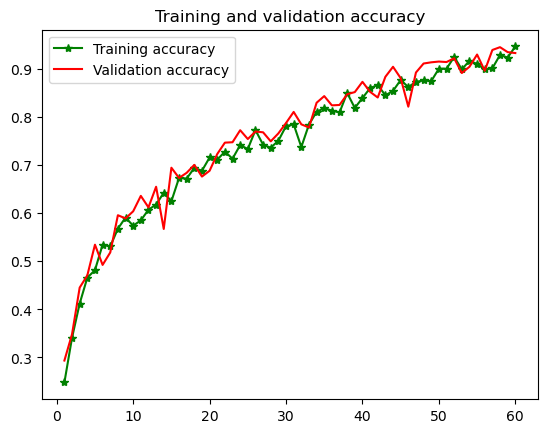

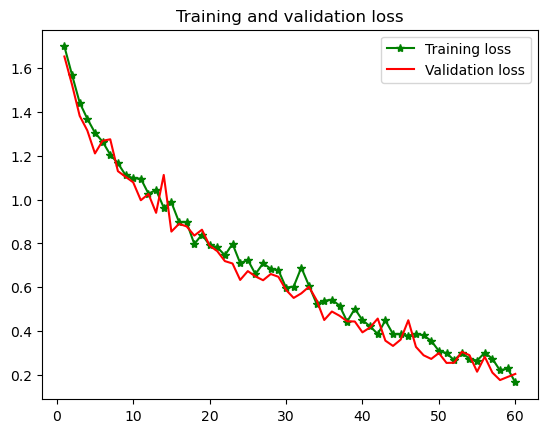

In [27]:
train_acc = history.history['accuracy'] # store training accuracy in history
val_acc = history.history['val_accuracy'] # store validation accuracy in history
train_loss = history.history['loss'] # store training loss in history
val_loss = history.history['val_loss'] # store validation loss in history

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'g*-', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'g*-', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Below shows that the CNN successfully classifies majority of all different household garbage. However, there is a great probability to some classes that the model may mistake garbage with glass and metal, or paper and glass.

In [28]:
import numpy as np

# Assuming X_test_preprocessed is your input data with shape (1, 32, 32)
X_test_preprocessed = np.random.rand(1, 32, 32)

# Reshape to add color channel dimension
X_test_preprocessed = np.reshape(X_test_preprocessed, (1, 32, 32, 1))

# Now X_test_preprocessed should have the correct shape
print("X_test_preprocessed shape:", X_test_preprocessed.shape)


X_test_preprocessed shape: (1, 32, 32, 1)


79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 150ms/step
 3/79 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step

/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step


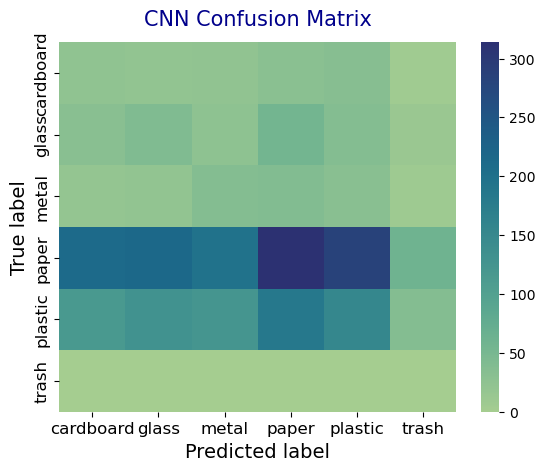

Classification Report
              precision    recall  f1-score   support

   cardboard       0.14      0.05      0.07       403
       glass       0.19      0.08      0.11       501
       metal       0.16      0.06      0.09       410
       paper       0.24      0.52      0.33       594
     plastic       0.20      0.31      0.25       482
       trash       0.00      0.00      0.00       137

    accuracy                           0.21      2527
   macro avg       0.16      0.17      0.14      2527
weighted avg       0.18      0.21      0.17      2527



In [29]:
#Confusion Matrix and Classification Report
import pandas as pd
import seaborn as sns
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split
import keras.utils as np_utils
from sklearn.metrics import confusion_matrix

(X,y) = (train_data_gen[0], train_data_gen[1])
y_test = train_test_split(X,y,test_size=0.2, random_state=4)

nb_classes = 6
Y_train = model.predict(train_data_gen)
y_train = np.argmax(Y_train, axis=1)
Y_test = model.predict(test_data_gen)
y_test = np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, y_train)

#visualize confusion matrix
matrix = pd.DataFrame((metrics.confusion_matrix(y_test, y_train)), ('cardboard', 'glass', 'metal','paper','plastic','trash'),
                      ('cardboard', 'glass', 'metal','paper','plastic','trash'))

heatmap = sns.heatmap(matrix, annot = False, annot_kws = {'size': 14}, fmt = 'd', cmap = 'crest')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), fontsize = 12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), fontsize = 12)
plt.title('CNN Confusion Matrix', fontsize = 15, pad = 12, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

print('Classification Report')
target_names = ['cardboard', 'glass', 'metal','paper','plastic','trash']
print(classification_report(train_data_gen.classes, y_test, target_names=target_names,zero_division=0))

Below shows the summary accuracy of each class which includes cardboard, glass, metal, paper, plastic, and trash. The accuracy was achieved with highest fine-tuning combinations of 60 epoch, 45 batch size, 0.01 learning rate, and an Adam optimizer

In [30]:
# to identify the accuracy of each class 
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Overall accuracy
print ("Cardboard Glass Metal Paper Plastic Trash")
ACC = (TP+TN)/(TP+FP+FN+TN)
print (ACC)

Cardboard Glass Metal Paper Plastic Trash
[0.80569846 0.78116343 0.80688564 0.49505342 0.61258409 0.95053423]


## Display Predictions (Random Images)

In [31]:
from skimage.transform import resize 

In [32]:
# from keras.preprocessing import image
import keras.utils as ku
import numpy as np
number_to_class = ['cardboard',\
                   'glass',\
                   'metal',
                   'paper',\
                   'plastic',\
                   'trash',]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


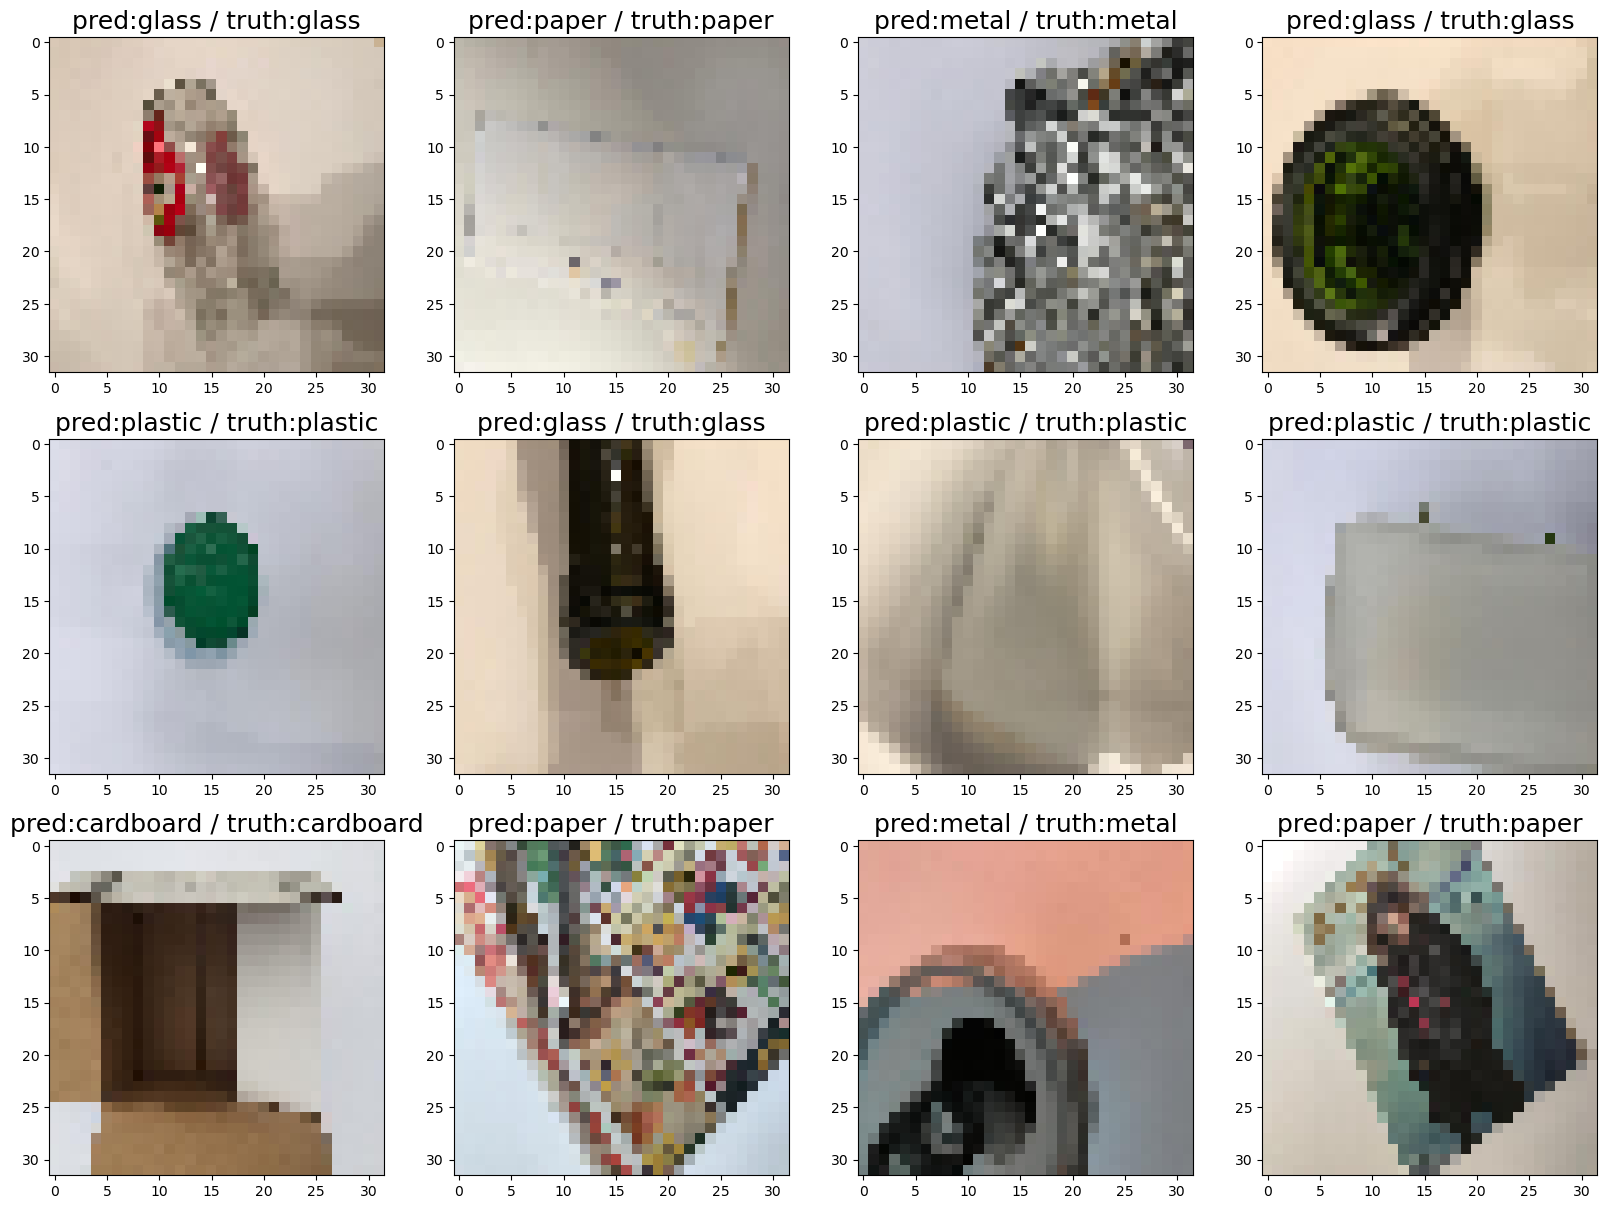

In [33]:
test_x, test_y = train_data_gen.__getitem__(1)

preds = model.predict(test_x)

plt.figure(figsize=(20, 20))
for i in range(12):
    plt.subplot(4,4, i+1)
    plt.title('pred:%s / truth:%s' % (number_to_class[np.argmax(preds[i])], number_to_class[np.argmax(test_y[i])]), size=18)
    plt.imshow(test_x[i])

---
### Class: Cardboard

---

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Predicted class: paper
Probability: 0.6184464


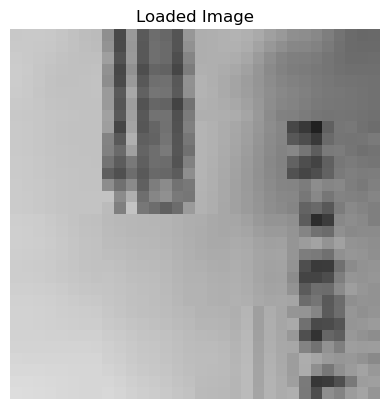

In [34]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as ku
import numpy as np

test_img = '/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/cardboard/cardboard_321.jpg'  # Update the path with the correct file path
img = ku.load_img(test_img, target_size=(32, 32))
img = ku.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0

prediction = model.predict(img)
predicted_class = number_to_class[np.argmax(prediction[0])]
print("Predicted class:", predicted_class)
print("Probability:", np.max(prediction[0]))

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")
plt.show()


---
### Class: Glass

---

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted class: paper
Probability: 0.8443555


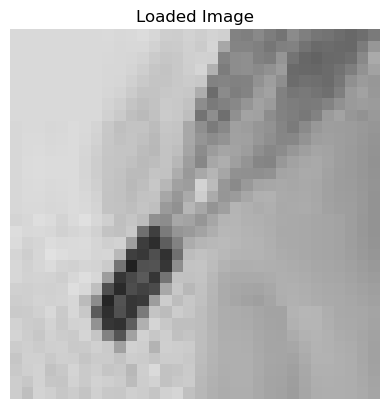

In [35]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as ku
import numpy as np

test_img = '/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/glass/glass_341.jpg'  # Update the path with the correct file path
img = ku.load_img(test_img, target_size=(32, 32))
img = ku.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0

prediction = model.predict(img)
predicted_class = number_to_class[np.argmax(prediction[0])]
print("Predicted class:", predicted_class)
print("Probability:", np.max(prediction[0]))

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")
plt.show()


---
### Class: Metal
---

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class: plastic
Probability: 0.70872843


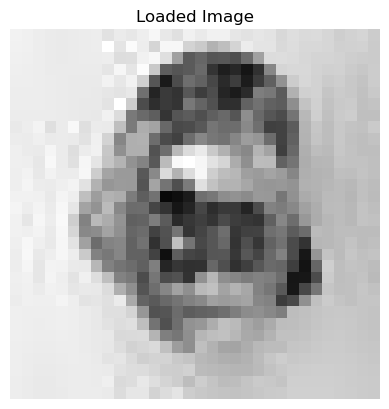

In [36]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as ku
import numpy as np

test_img = '/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/metal/metal_100.jpg'  # Update the path with the correct file path
img = ku.load_img(test_img, target_size=(32, 32))
img = ku.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0

prediction = model.predict(img)
predicted_class = number_to_class[np.argmax(prediction[0])]
print("Predicted class:", predicted_class)
print("Probability:", np.max(prediction[0]))

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")
plt.show()


---
### Class: Paper

---

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class: paper
Probability: 0.9974462


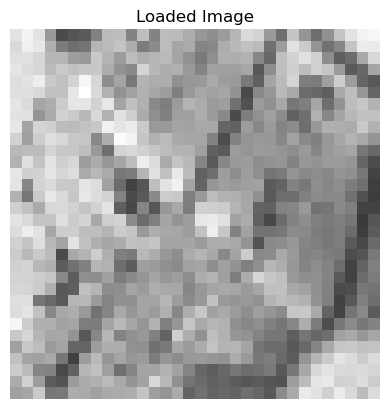

In [37]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as ku
import numpy as np

test_img = '/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/paper/paper_324.jpg'  # Update the path with the correct file path
img = ku.load_img(test_img, target_size=(32, 32))
img = ku.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0

prediction = model.predict(img)
predicted_class = number_to_class[np.argmax(prediction[0])]
print("Predicted class:", predicted_class)
print("Probability:", np.max(prediction[0]))

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")
plt.show()


---
### Class: Plastic

---

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class: plastic
Probability: 0.9582482


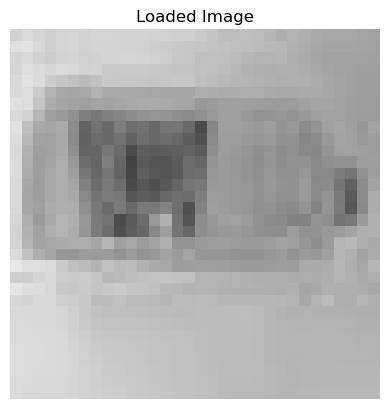

In [38]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as ku
import numpy as np

test_img = '/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/plastic/plastic_155.jpg'  # Update the path with the correct file path
img = ku.load_img(test_img, target_size=(32, 32))
img = ku.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0

prediction = model.predict(img)
predicted_class = number_to_class[np.argmax(prediction[0])]
print("Predicted class:", predicted_class)
print("Probability:", np.max(prediction[0]))

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")
plt.show()


---
### Class: Trash
---

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted class: paper
Probability: 0.8927842


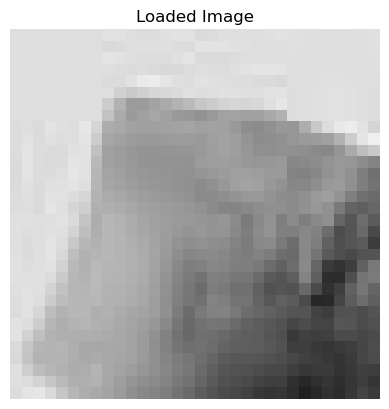

In [39]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as ku
import numpy as np

test_img = '/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/trash/trash_032.jpg'  # Update the path with the correct file path
img = ku.load_img(test_img, target_size=(32, 32))
img = ku.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0

prediction = model.predict(img)
predicted_class = number_to_class[np.argmax(prediction[0])]
print("Predicted class:", predicted_class)
print("Probability:", np.max(prediction[0]))

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")
plt.show()


## Deployment


In [40]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define constants
IMG_HEIGHT = 32
IMG_WIDTH = 32
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Define your model layers
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(len(class_names), activation='softmax')
])

# Compile the model (even though we're not training)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Save the model to an HDF5 file
model.save('garbage_classification.h5')



/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define constants
IMG_HEIGHT = 32
IMG_WIDTH = 32
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Define your model layers
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(len(class_names), activation='softmax')
])

# Compile the model (even though we're not training)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Save the model to a native Keras format file
model.save('garbage_classification.keras')


In [42]:
import os

# Get the current working directory
current_dir = os.getcwd()

# Specify the filename of your saved model
model_filename = 'garbage_classification.keras'  # Replace 'your_model_name.keras' with your actual filename

# Combine the current directory with the model filename to get the full path
model_path = os.path.join(current_dir, model_filename)

print("The model is saved at:", model_path)


The model is saved at: /Users/ounissifadoua/Downloads/garbage_classification.keras


In [43]:
pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.


In [44]:
converter.experimental_new_converter = True

NameError: name 'converter' is not defined

In [ ]:
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]


In [ ]:
def convert(model):
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()

    with open('model.tflite', 'wb') as f:
        f.write(tflite_model)

In [ ]:
pip install --upgrade tensorflow


In [ ]:
import tensorflow as tf
import tflite
#import tflite_runtime as tflite

print("TensorFlow version:", tf.__version__)
print("TensorFlow Lite version:", tflite.__version__)


In [ ]:
pip install tensorflow tensorflow_hub


In [ ]:
pip install --upgrade tensorflow tensorflow_hub tensorflow_text tensorflow_io tensorflow_datasets


In [ ]:
from tensorflow.keras.models import load_model, save_model

# Assuming you have a trained model stored in a variable called 'model'
model.save('/Users/ounissifadoua/Downloads/garbage_classification.h5')


In [ ]:
model.save("/Users/ounissifadoua/Downloads/garbage_classification.h5")


In [40]:
import tensorflow as tf

# Create a model using low-level tf.* APIs
class Squared(tf.Module):
  @tf.function(input_signature=[tf.TensorSpec(shape=[None], dtype=tf.float32)])
  def __call__(self, x):
    return tf.square(x)
model = Squared()
# (ro run your model) result = Squared(5.0) # This prints "25.0"
# (to generate a SavedModel) tf.saved_model.save(model, "saved_model_tf_dir")
concrete_func = model.__call__.get_concrete_function()

# Convert the model.

converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func],
                                                            model)
tflite_model = converter.convert()

# Save the model.
with open('/Users/ounissifadoua/Downloads/garbage_classification.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/b6/m5tt2bts2w3fy8n0ffl7snbr0000gn/T/tmpwatxk5c1/assets


INFO:tensorflow:Assets written to: /var/folders/b6/m5tt2bts2w3fy8n0ffl7snbr0000gn/T/tmpwatxk5c1/assets
W0000 00:00:1715600731.221048  196399 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1715600731.221104  196399 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2024-05-13 12:45:31.221421: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/b6/m5tt2bts2w3fy8n0ffl7snbr0000gn/T/tmpwatxk5c1
2024-05-13 12:45:31.221764: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-05-13 12:45:31.221781: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/b6/m5tt2bts2w3fy8n0ffl7snbr0000gn/T/tmpwatxk5c1
2024-05-13 12:45:31.224315: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2024-05-13 12:45:31.239355: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: /var/folders/b6/m5tt2bts

In [41]:
class Squared(tf.Module):
  @tf.function(input_signature=[tf.TensorSpec(shape=[None], dtype=tf.float32)])
  def __call__(self, x):
    return tf.square(x)
model = Squared()


In [42]:
concrete_func = model.__call__.get_concrete_function()


In [43]:
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func], model)
tflite_model = converter.convert()


INFO:tensorflow:Assets written to: /var/folders/b6/m5tt2bts2w3fy8n0ffl7snbr0000gn/T/tmpfd6uoklo/assets


INFO:tensorflow:Assets written to: /var/folders/b6/m5tt2bts2w3fy8n0ffl7snbr0000gn/T/tmpfd6uoklo/assets
W0000 00:00:1715600898.724221  196399 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1715600898.724266  196399 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2024-05-13 12:48:18.724582: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/b6/m5tt2bts2w3fy8n0ffl7snbr0000gn/T/tmpfd6uoklo
2024-05-13 12:48:18.724913: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-05-13 12:48:18.724929: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/b6/m5tt2bts2w3fy8n0ffl7snbr0000gn/T/tmpfd6uoklo
2024-05-13 12:48:18.727772: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2024-05-13 12:48:18.738707: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: /var/folders/b6/m5tt2bts

In [44]:
with open('/Users/ounissifadoua/Downloads/garbage_classification.tflite', 'wb') as f:
  f.write(tflite_model)


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the new input shape
input_shape = (64, 64, 3)

model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,182 (196.02 KB)

 Trainable params: 50,182 (196.02 KB)

 Non-trainable params: 0 (0.00 B)

In [1]:
import os

# Get the current working directory
current_dir = os.getcwd()

# Specify the filename of your saved model
model_filename = 'model.h5'  # Replace 'your_model_name.keras' with your actual filename

# Combine the current directory with the model filename to get the full path
model_path = os.path.join(current_dir, model_filename)

print("The model is saved at:", model_path)

The model is saved at: /Users/ounissifadoua/Downloads/model.h5
